<a href="https://colab.research.google.com/github/solharsh/Capstone_Sentiment_Analysis/blob/master/Classification_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub
#import tokenization
import seaborn as sns
import matplotlib.pyplot as plt
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
import pickle
DATA_PATH = "/content/drive/My Drive/Capstone Project - NLP"
infile = open(DATA_PATH+'/df.pkl','rb')
df = pickle.load(infile)

In [29]:
df.head()

,Name,Date,Speech,Clean,Clean_english
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011 Speech ofPranab MukherjeeMi...,rise Union,rise Union
1,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budg...",interim regular economy grave uncertainties,interim regular economy grave
2,Pranab Mukherjee,"February 26, 2010",Growth had started decelerating and the busin...,Growth started decelerating business sentiment...,Growth business sentiment weak
3,Pranab Mukherjee,"February 26, 2010",The economy's capacity to sustain high growth...,economy capacity sustain high growth threat wi...,economy capacity sustain high growth threat wi...
5,Pranab Mukherjee,"February 26, 2010","It was not clear to us, as also to the polic...",policy makers countries crisis eventually unfold,policy crisis eventually unfold


In [30]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 8.3MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

sentiment=[]
for sentence in df.Clean_english:
  sentiment.append(analyser.polarity_scores(sentence)['compound'])

df['sentiment_vadar']=sentiment

In [32]:
df

,Name,Date,Speech,Clean,Clean_english,sentiment_vadar
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011 Speech ofPranab MukherjeeMi...,rise Union,rise Union,0.0000
1,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budg...",interim regular economy grave uncertainties,interim regular economy grave,-0.3818
2,Pranab Mukherjee,"February 26, 2010",Growth had started decelerating and the busin...,Growth started decelerating business sentiment...,Growth business sentiment weak,-0.0772
3,Pranab Mukherjee,"February 26, 2010",The economy's capacity to sustain high growth...,economy capacity sustain high growth threat wi...,economy capacity sustain high growth threat wi...,-0.2023
5,Pranab Mukherjee,"February 26, 2010","It was not clear to us, as also to the polic...",policy makers countries crisis eventually unfold,policy crisis eventually unfold,-0.6249
...,...,...,...,...,...,...
12311,Piyush Goyal,"February 1, 2019",Development has become a mass-movement during...,Development mass movement period Government,Development mass movement period Government,0.0000
12313,Piyush Goyal,"February 1, 2019",We will transform India into a leading nation...,transform leading nation world help people,transform leading nation world help people,0.4019
12314,Piyush Goyal,"February 1, 2019","We, along with them have laid the foundation",laid foundation,laid foundation,0.0000
12315,Piyush Goyal,"February 1, 2019",A grand edifice will be erected with their su...,grand edifice erected support,grand edifice support,0.6908


# Classification

In [0]:
df_selected = df[['Clean_english','sentiment_vadar']]

In [34]:
df_selected

,Clean_english,sentiment_vadar
0,rise Union,0.0000
1,interim regular economy grave,-0.3818
2,Growth business sentiment weak,-0.0772
3,economy capacity sustain high growth threat wi...,-0.2023
5,policy crisis eventually unfold,-0.6249
...,...,...
12311,Development mass movement period Government,0.0000
12313,transform leading nation world help people,0.4019
12314,laid foundation,0.0000
12315,grand edifice support,0.6908


In [35]:
df_selected["sentiment_vadar"] = df_selected["sentiment_vadar"].apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_selected

,Clean_english,sentiment_vadar
0,rise Union,0
1,interim regular economy grave,0
2,Growth business sentiment weak,0
3,economy capacity sustain high growth threat wi...,0
5,policy crisis eventually unfold,0
...,...,...
12311,Development mass movement period Government,0
12313,transform leading nation world help people,1
12314,laid foundation,0
12315,grand edifice support,1


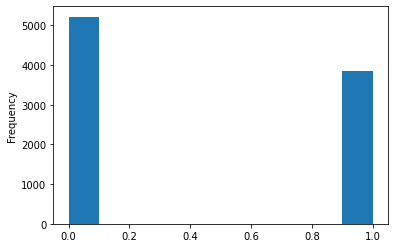

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

df_selected["sentiment_vadar"].plot.hist()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_selected[["Clean_english"]],
                                                  df_selected["sentiment_vadar"].tolist(),
                                                  test_size=0.10,
                                                  shuffle=True
                                                 )

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=200    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["Clean_english"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["Clean_english"].tolist())

In [67]:
print(tfidf_vectorizer.vocabulary_)

{'benefit': 17, 'market': 119, 'exemption': 69, 'extended': 72, 'propose': 149, 'corporate': 38, 'income': 96, 'tax': 184, 'extend': 71, 'investment': 107, 'deduction': 47, 'financial': 74, 'sector': 167, 'growth': 86, 'economy': 56, 'needs': 127, 'support': 180, 'provide': 150, 'cost': 39, 'capital': 23, 'goods': 83, 'central': 27, 'scheme': 165, 'infrastructure': 102, 'enable': 61, 'department': 49, 'focus': 76, 'national': 124, 'pension': 134, 'system': 181, 'order': 132, 'effect': 58, 'taken': 182, 'increase': 97, 'limit': 112, 'current': 45, 'payment': 133, 'case': 24, 'government': 84, 'section': 166, 'account': 1, 'skill': 172, 'development': 50, 'continue': 37, 'customs': 46, 'target': 183, 'domestic': 53, 'money': 123, 'major': 114, 'access': 0, 'policy': 140, 'work': 197, 'enhance': 65, 'revenue': 162, 'self': 169, 'cent': 26, 'total': 188, 'respect': 160, 'reduce': 158, 'small': 173, 'bring': 20, 'levy': 110, 'rate': 156, 'agriculture': 6, 'fund': 80, 'crore': 44, 'plan': 13

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, f1_score
# To improve the performance of LogisticRegression we can tune its parameters, for example:
# * regularization type: penalty = {l1, l2, elasticnet}
# * regularization strength: C = {smaller values specify stronger regularization} 
#    !!! LogisticRegression regularized cost function: C*Cost(w) + penalty(w), 
# where w is the weights vector !!!
# * addressing class imbalance: 
# class_weight = {balanced or {class label:weight, class label:weight}, ...}
lrClassifier = LogisticRegression(penalty = 'l2',
                                  C = 0.1,
                                  class_weight = 'balanced')
lrClassifier.fit(X_train_text_vectors, y_train)
lrClassifier_val_predictions = lrClassifier.predict(X_val_text_vectors)
 
print("LogisticRegression on Validation: Accuracy Score: %f, F1-score: %f" % \
      (accuracy_score(y_val, lrClassifier_val_predictions), f1_score(y_val, lrClassifier_val_predictions)))

LogisticRegression on Validation: Accuracy Score: 0.789416, F1-score: 0.700157


In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
 
# Calculate the precision and recall using different values for the classification threshold
val_predictions_probs = lrClassifier.predict_proba(X_val_text_vectors)
precisions, recalls, thresholds = precision_recall_curve(y_val, val_predictions_probs[:, 1])

Highest F1 score on Validation: 0.7093596059113302 , Threshold for the highest F1 score: 0.544688858001977


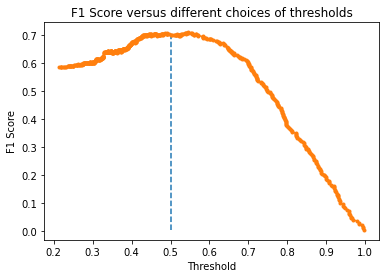

In [70]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
# Calculate the F1 score using different values for the classification threshold, 
# and pick the threshold that resulted in the highest F1 score.
highest_f1 = 0
threshold_highest_f1 = 0
f1_scores = []
for id, threshold in enumerate(thresholds):

    f1_score = 2*precisions[id]*recalls[id]/(precisions[id]+recalls[id])
    f1_scores.append(f1_score)
    if(f1_score > highest_f1):
        highest_f1 = f1_score
        threshold_highest_f1 = threshold
print("Highest F1 score on Validation:", highest_f1, \
      ", Threshold for the highest F1 score:", threshold_highest_f1)
# Let's plot the F1 score versus different choices of thresholds
plt.plot([0.5, 0.5], [np.min(f1_scores), np.max(f1_scores)], linestyle='--')
plt.plot(thresholds, f1_scores, marker='.')
plt.title('F1 Score versus different choices of thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()

In [71]:
# Training the model and checking on Validation data
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

lrClassifier = LogisticRegression(penalty = 'l2')

lrClassifier.fit(X_train_text_vectors, y_train)
lrClassifier_val_predictions = lrClassifier.predict(X_val_text_vectors)
print(classification_report(y_val, lrClassifier_val_predictions)) 

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       535
           1       0.91      0.57      0.70       372

    accuracy                           0.80       907
   macro avg       0.84      0.77      0.78       907
weighted avg       0.83      0.80      0.79       907



# K Nearest Neighbors Model

In [0]:
#Let's get our binary vectors for the text field

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=200    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["Clean_english"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["Clean_english"].tolist())

In [73]:
print(tfidf_vectorizer.vocabulary_)

{'benefit': 17, 'market': 119, 'exemption': 69, 'extended': 72, 'propose': 149, 'corporate': 38, 'income': 96, 'tax': 184, 'extend': 71, 'investment': 107, 'deduction': 47, 'financial': 74, 'sector': 167, 'growth': 86, 'economy': 56, 'needs': 127, 'support': 180, 'provide': 150, 'cost': 39, 'capital': 23, 'goods': 83, 'central': 27, 'scheme': 165, 'infrastructure': 102, 'enable': 61, 'department': 49, 'focus': 76, 'national': 124, 'pension': 134, 'system': 181, 'order': 132, 'effect': 58, 'taken': 182, 'increase': 97, 'limit': 112, 'current': 45, 'payment': 133, 'case': 24, 'government': 84, 'section': 166, 'account': 1, 'skill': 172, 'development': 50, 'continue': 37, 'customs': 46, 'target': 183, 'domestic': 53, 'money': 123, 'major': 114, 'access': 0, 'policy': 140, 'work': 197, 'enhance': 65, 'revenue': 162, 'self': 169, 'cent': 26, 'total': 188, 'respect': 160, 'reduce': 158, 'small': 173, 'bring': 20, 'levy': 110, 'rate': 156, 'agriculture': 6, 'fund': 80, 'crore': 44, 'plan': 13

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [75]:
K_values = [3, 5, 10, 20, 30]
 
for K in K_values:
    knnClassifier = KNeighborsClassifier(n_neighbors=K)
    knnClassifier.fit(X_train_text_vectors, y_train)
    val_predictions = knnClassifier.predict(X_val_text_vectors)
    print("F1 Score for K:", K, "is", f1_score(y_val, val_predictions))

F1 Score for K: 3 is 0.527363184079602
F1 Score for K: 5 is 0.5054151624548736
F1 Score for K: 10 is 0.40748440748440745
F1 Score for K: 20 is 0.30248306997742663
F1 Score for K: 30 is 0.2632794457274827


In [76]:
pip install docx2txt

In [0]:
import docx2txt

In [0]:
# read in word file
df_2020 = docx2txt.process("/content/drive/My Drive/NLP/budget_speech.docx")

In [0]:
import re
df_2020 = re.sub('\s+', ' ', df_2020)
df_2020= df_2020.split("2020-2021. Introduction",1)[1] 

In [80]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.tokenize import sent_tokenize
list_2020= sent_tokenize(df_2020)

In [0]:
import pandas as pd
df_2020_selected = pd.DataFrame(list_2020, columns=['Speech'])

In [83]:
df_2020_selected

,Speech
0,"In May 2019, Prime Minister Modi received a m..."
1,"With renewed vigour, under his leadership, we ..."
2,2.
3,People of India have unequivocally given their...
4,This is the Budget to boost their incomes and ...
...,...
1127,3 The refund of accumulated credit of compensa...
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.
1129,This notification is being given retrospective...
1130,"Accordingly, no refund on account of inverted ..."


In [0]:
k=0
desc_list=[]
for line in df_2020_selected.Speech:  
  text = re.sub('<.*?>', '',line) #This expression removes the <br> which is found at the end of every sentence
  text = re.sub(r'[^A-Za-z]+', ' ', text)
  text = re.sub(r'[\d{1,}]+',' ',text)
  desc_list.append(re.sub('Borrower added on \d{2}/\d{2}/\d{2} >', '', text)) # This removes the date/year in every sentence
  
  k=k+1
df_2020_selected['Speech_cleaned'] = desc_list

In [85]:
df_2020_selected

,Speech,Speech_cleaned
0,"In May 2019, Prime Minister Modi received a m...",In May Prime Minister Modi received a massive...
1,"With renewed vigour, under his leadership, we ...",With renewed vigour under his leadership we co...
2,2.,
3,People of India have unequivocally given their...,People of India have unequivocally given their...
4,This is the Budget to boost their incomes and ...,This is the Budget to boost their incomes and ...
...,...,...
1127,3 The refund of accumulated credit of compensa...,The refund of accumulated credit of compensat...
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.,Compensation Cess Rate dated
1129,This notification is being given retrospective...,This notification is being given retrospective...
1130,"Accordingly, no refund on account of inverted ...",Accordingly no refund on account of inverted d...


In [86]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [87]:
%%time

# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_2020_selected["Speech_cleaned"] = df_2020_selected["Speech_cleaned"].apply(lambda x: clean_text(x))

CPU times: user 841 ms, sys: 32.2 ms, total: 873 ms
Wall time: 873 ms


In [88]:
df_2020_selected

,Speech,Speech_cleaned
0,"In May 2019, Prime Minister Modi received a m...",may prime minister modi receive massive mandat...
1,"With renewed vigour, under his leadership, we ...",renew vigour leadership commit serve people in...
2,2.,
3,People of India have unequivocally given their...,people india unequivocally give jan aadesh pol...
4,This is the Budget to boost their incomes and ...,budget boost income enhance purchase power
...,...,...
1127,3 The refund of accumulated credit of compensa...,refund accumulate credit compensation ce tobac...
1128,3/2019- Compensation Cess (Rate) dated 30.9.2019.,compensation ce rate date
1129,This notification is being given retrospective...,notification give retrospective effect onwards
1130,"Accordingly, no refund on account of inverted ...",accordingly refund account invert duty structu...


In [89]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

snow = SnowballStemmer('english') 
stop = stopwords.words('english')

#excluding some useful words from stop words list
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
            "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
            
stop_words = [word for word in stop if word not in excluding]

def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        sent = sent.lower()
        for w in word_tokenize(sent):
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words

        final_text_list.append(final_string)
    return final_text_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
print("Process test dataset")
X_test_text_processed = process_text(df_2020_selected["Speech_cleaned"].values) 

Process test dataset


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_title_vectorizer = TfidfVectorizer(max_features=50)
tfidf_text_vectorizer = TfidfVectorizer(max_features=2000)

X_test_text_vectors = tfidf_vectorizer.transform(X_test_text_processed)

In [0]:
# Make predictions using our trained model
test_prediction = lrClassifier.predict(X_test_text_vectors)

In [0]:
result_df = pd.DataFrame()
result_df["Cleaned_2020_Speech"] = df_2020_selected["Speech_cleaned"]
result_df["sentiment"] = test_prediction

In [109]:
result_df.head(50)

,Cleaned_2020_Speech,sentiment
0,may prime minister modi receive massive mandat...,0
1,renew vigour leadership commit serve people in...,0
2,,0
3,people india unequivocally give jan aadesh pol...,0
4,budget boost income enhance purchase power,0
5,high growth achieve youth gainfully meaningful...,1
6,let business innovative healthy solvent use te...,0
7,,0
8,today youth bear turn century every member sch...,0
9,,0


In [0]:
result_df.to_csv("/content/drive/My Drive/Capstone Project - NLP/Harsh/sentiment_prediction_speech_2020.csv", encoding='utf-8', index=False)